# Read_file

In [35]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

data=pd.read_csv("flight_data.csv",index_col=0)
data

/home/inithan/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:583: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



,Origin,CRSDepTime_time_stamp_round,Dest,CRSArrTime_time_stamp_round,ArrDel15,ArrDelayMinutes,Flights,Distance,DistanceGroup,CRSElapsedTime,...,visibility_dest,weatherCode_dest,tempC_dest,tempF_dest,WindChillF_dest,WindChillC_dest,winddirDegree_dest,humidity_dest,airport_dest,weather_time_stamp_dest
0,LAX,2016-11-05 09:00:00,LAS,2016-11-05 10:00:00,0.0,0.0,1.0,236.0,1,79.0,...,10,113,20,68,66,19,208,52,LAS,2016-11-05 10:00:00
1,LAX,2016-11-05 08:00:00,LAS,2016-11-05 10:00:00,0.0,0.0,1.0,236.0,1,80.0,...,10,113,20,68,66,19,208,52,LAS,2016-11-05 10:00:00
2,LAX,2016-11-05 08:00:00,LAS,2016-11-05 10:00:00,0.0,0.0,1.0,236.0,1,65.0,...,10,113,20,68,66,19,208,52,LAS,2016-11-05 10:00:00
3,LAX,2016-11-05 08:00:00,LAS,2016-11-05 10:00:00,1.0,246.0,1.0,236.0,1,84.0,...,10,113,20,68,66,19,208,52,LAS,2016-11-05 10:00:00
4,SEA,2016-11-05 08:00:00,LAS,2016-11-05 10:00:00,0.0,0.0,1.0,867.0,4,156.0,...,10,113,20,68,66,19,208,52,LAS,2016-11-05 10:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1851244,LAS,2017-11-26 05:00:00,PHX,2017-11-26 06:00:00,0.0,0.0,1.0,255.0,2,65.0,...,10,113,15,59,59,15,56,40,PHX,2017-11-26 06:00:00
1851245,LAX,2017-11-26 05:00:00,PHX,2017-11-26 06:00:00,0.0,0.0,1.0,370.0,2,80.0,...,10,113,15,59,59,15,56,40,PHX,2017-11-26 06:00:00
1851246,LAS,2017-11-27 05:00:00,LAX,2017-11-27 06:00:00,0.0,0.0,1.0,236.0,1,70.0,...,10,116,16,60,59,15,271,92,LAX,2017-11-27 06:00:00
1851247,LAS,2017-11-27 05:00:00,PHX,2017-11-27 06:00:00,0.0,0.0,1.0,255.0,2,65.0,...,10,113,15,59,59,15,71,35,PHX,2017-11-27 06:00:00


In [36]:
data=data.drop(['CRSDepTime_time_stamp_round',
'CRSArrTime_time_stamp_round',
'weather_time_stamp_origin',
'weather_time_stamp_dest','Origin','Dest','airport_dest','Flights','airport_origin'], axis=1)

# identify catagorical and numerical variable

In [37]:
numerical_col=[]
catagorical_varible=[]
for i in data.columns.to_list():
    try:
        data[i]=data[i].astype(int)
        numerical_col.append(i)
    except:
        catagorical_varible.append(i)
catagorical_varible

['winddir16Point_origin', 'winddir16Point_dest']

In [38]:
target_variable=['ArrDel15','ArrDelayMinutes']
target_variable

['ArrDel15', 'ArrDelayMinutes']

In [39]:
for i in numerical_col:
    if (len(data[i].unique())<75):
        #print(i)
        print(i,"*"*5,len(data[i].unique()),"unique values found")

ArrDel15 ***** 2 unique values found
DistanceGroup ***** 11 unique values found
windspeedKmph_origin ***** 56 unique values found
DewPointC_origin ***** 55 unique values found
windspeedMiles_origin ***** 36 unique values found
precipMM_origin ***** 31 unique values found
WindGustMiles_origin ***** 52 unique values found
pressure_origin ***** 63 unique values found
visibility_origin ***** 21 unique values found
weatherCode_origin ***** 43 unique values found
tempC_origin ***** 73 unique values found
windspeedKmph_dest ***** 56 unique values found
DewPointC_dest ***** 55 unique values found
windspeedMiles_dest ***** 36 unique values found
precipMM_dest ***** 32 unique values found
WindGustMiles_dest ***** 52 unique values found
pressure_dest ***** 66 unique values found
visibility_dest ***** 21 unique values found
weatherCode_dest ***** 43 unique values found
tempC_dest ***** 73 unique values found


In [40]:
catagorical_varible=catagorical_varible+['weatherCode_origin']+['weatherCode_dest']
catagorical_varible

['winddir16Point_origin',
 'winddir16Point_dest',
 'weatherCode_origin',
 'weatherCode_dest']

In [41]:
for i in numerical_col:
        for j in ['FeelsLikeC','windspeedMiles','DewPointC','HeatIndexC','WindGustMiles','tempC','WindChillC']:
            if j in i:
                print("'"+i+"',")

'FeelsLikeC_origin',
'DewPointC_origin',
'windspeedMiles_origin',
'HeatIndexC_origin',
'WindGustMiles_origin',
'tempC_origin',
'WindChillC_origin',
'FeelsLikeC_dest',
'DewPointC_dest',
'windspeedMiles_dest',
'HeatIndexC_dest',
'WindGustMiles_dest',
'tempC_dest',
'WindChillC_dest',


In [42]:
#removing date variable and codes
numerical_variable=[i for i in numerical_col if i not in catagorical_varible]

#removing target varible
numerical_variable=[i for i in numerical_variable if i not in target_variable]

#removing celcius and miles
numerical_variable=[i for i in numerical_variable if i not in['FeelsLikeC_origin',
'DewPointC_origin',
'windspeedMiles_origin',
'HeatIndexC_origin',
'WindGustMiles_origin',
'tempC_origin',
'WindChillC_origin',
'FeelsLikeC_dest',
'DewPointC_dest',
'windspeedMiles_dest',
'HeatIndexC_dest',
'WindGustMiles_dest',
'tempC_dest',
'WindChillC_dest',]]
numerical_variable

['Distance',
 'DistanceGroup',
 'CRSElapsedTime',
 'windspeedKmph_origin',
 'FeelsLikeF_origin',
 'DewPointF_origin',
 'HeatIndexF_origin',
 'cloudcover_origin',
 'precipMM_origin',
 'pressure_origin',
 'WindGustKmph_origin',
 'visibility_origin',
 'tempF_origin',
 'WindChillF_origin',
 'winddirDegree_origin',
 'humidity_origin',
 'windspeedKmph_dest',
 'FeelsLikeF_dest',
 'DewPointF_dest',
 'HeatIndexF_dest',
 'cloudcover_dest',
 'precipMM_dest',
 'pressure_dest',
 'WindGustKmph_dest',
 'visibility_dest',
 'tempF_dest',
 'WindChillF_dest',
 'winddirDegree_dest',
 'humidity_dest']

# Univariate Analysis

## VISUALIZING CATEGORICAL VARIABLES 

In [43]:
# import plotly.express as px

# for i in catagorical_varible:
#     fig = px.histogram(data, x=i)
#     fig.show()

In [44]:
for i in catagorical_varible:
    fig = px.bar(data, x=data[i].value_counts(normalize=True)[:20].mul(100).values.tolist(), y=data[i].value_counts(normalize=True)[:20].mul(100).index.tolist(), orientation='h')
    fig.update_xaxes(title_text='percentage')
    fig.update_yaxes(title_text=i)
    fig.show()
    

## VISUALIZING TARGET VARIABLES 

In [45]:
fig = px.bar(data, x=data[target_variable[0]].value_counts(normalize=True)[:20].mul(100).values.tolist(), y=data[target_variable[0]].value_counts(normalize=True)[:20].mul(100).index.tolist(), orientation='h')
fig.update_xaxes(title_text='percentage')
fig.update_yaxes(title_text=target_variable[0])
fig.show()
    

## VISUALIZING NUMERICAL OR CONTINUOUS VARIABLES 

In [46]:
#distribusion of all numerical variables
data[numerical_variable].describe()

,Distance,DistanceGroup,CRSElapsedTime,windspeedKmph_origin,FeelsLikeF_origin,DewPointF_origin,HeatIndexF_origin,cloudcover_origin,precipMM_origin,pressure_origin,...,HeatIndexF_dest,cloudcover_dest,precipMM_dest,pressure_dest,WindGustKmph_dest,visibility_dest,tempF_dest,WindChillF_dest,winddirDegree_dest,humidity_dest
count,1.851249e+06,1.851249e+06,1.851249e+06,1.851249e+06,1.851249e+06,1.851249e+06,1.851249e+06,1.851249e+06,1.851249e+06,1.851249e+06,...,1.851249e+06,1.851249e+06,1.851249e+06,1.851249e+06,1.851249e+06,1.851249e+06,1.851249e+06,1.851249e+06,1.851249e+06,1.851249e+06
mean,1.163424e+03,5.064810e+00,1.874457e+02,1.232504e+01,6.497558e+01,4.936521e+01,6.632647e+01,4.265575e+01,1.784698e-01,1.016143e+03,...,6.710842e+01,4.166077e+01,1.811923e-01,1.016002e+03,1.699616e+01,9.492370e+00,6.596161e+01,6.470494e+01,1.893226e+02,6.226973e+01
std,6.800618e+02,2.717702e+00,8.405339e+01,6.496003e+00,2.016318e+01,1.613735e+01,1.830390e+01,3.966942e+01,9.046790e-01,6.314913e+00,...,1.822513e+01,3.933023e+01,9.216976e-01,6.326818e+00,9.066116e+00,1.743987e+00,1.710201e+01,1.892767e+01,8.630516e+01,2.259002e+01
min,1.920000e+02,1.000000e+00,5.500000e+01,0.000000e+00,-2.500000e+01,-1.500000e+01,-1.000000e+01,0.000000e+00,0.000000e+00,9.840000e+02,...,-1.000000e+01,0.000000e+00,0.000000e+00,9.810000e+02,0.000000e+00,0.000000e+00,-1.000000e+01,-2.500000e+01,0.000000e+00,3.000000e+00
25%,6.410000e+02,3.000000e+00,1.250000e+02,7.000000e+00,5.300000e+01,3.800000e+01,5.500000e+01,0.000000e+00,0.000000e+00,1.012000e+03,...,5.600000e+01,0.000000e+00,0.000000e+00,1.012000e+03,1.000000e+01,1.000000e+01,5.500000e+01,5.400000e+01,1.250000e+02,4.700000e+01
50%,9.540000e+02,4.000000e+00,1.650000e+02,1.100000e+01,6.600000e+01,5.100000e+01,6.600000e+01,3.400000e+01,0.000000e+00,1.016000e+03,...,6.700000e+01,3.300000e+01,0.000000e+00,1.016000e+03,1.500000e+01,1.000000e+01,6.700000e+01,6.700000e+01,1.980000e+02,6.600000e+01
75%,1.660000e+03,7.000000e+00,2.450000e+02,1.600000e+01,7.900000e+01,6.200000e+01,7.900000e+01,8.400000e+01,0.000000e+00,1.020000e+03,...,8.000000e+01,8.200000e+01,0.000000e+00,1.020000e+03,2.200000e+01,1.000000e+01,7.800000e+01,7.800000e+01,2.570000e+02,8.100000e+01
max,2.724000e+03,1.100000e+01,5.100000e+02,5.900000e+01,1.330000e+02,8.200000e+01,1.330000e+02,1.000000e+02,3.000000e+01,1.046000e+03,...,1.330000e+02,1.000000e+02,3.700000e+01,1.046000e+03,8.200000e+01,2.000000e+01,1.210000e+02,1.210000e+02,3.600000e+02,1.000000e+02


# corealtion
<img src='corealtion.png' width="500" height="100">


## Catagorical vs Catagorical

### heat map

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5]), <a list of 34 Text yticklabel objects>)

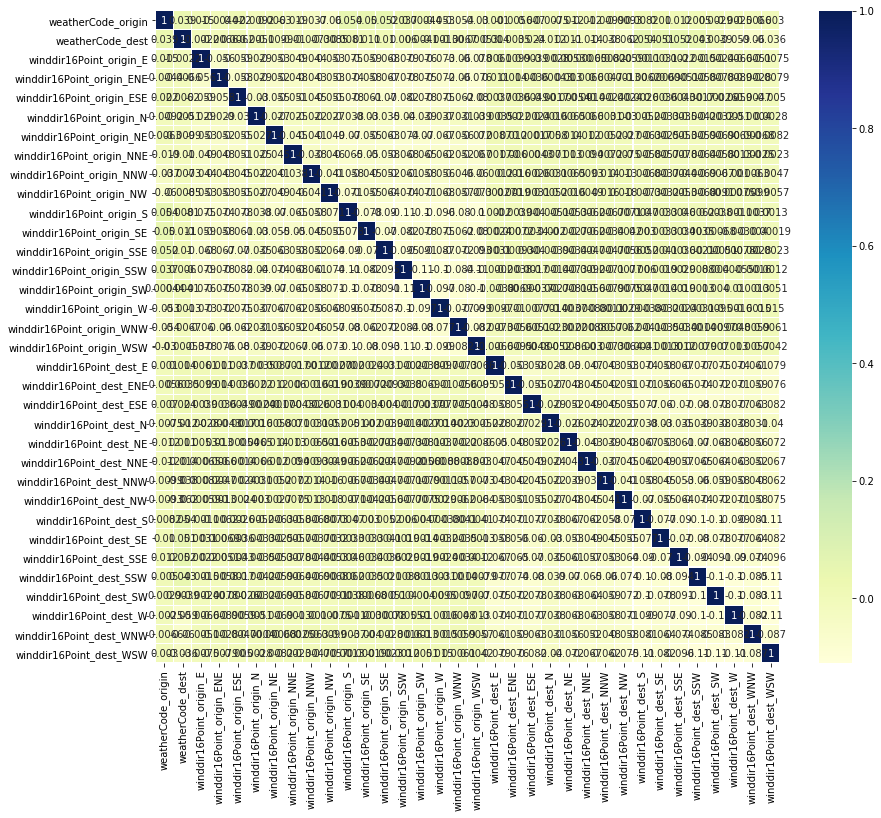

In [47]:
dfDummies = pd.get_dummies(data[catagorical_varible])

plt.figure(figsize=(14,12))
sns.heatmap(dfDummies.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0)

[None, None, None, None, None, None]

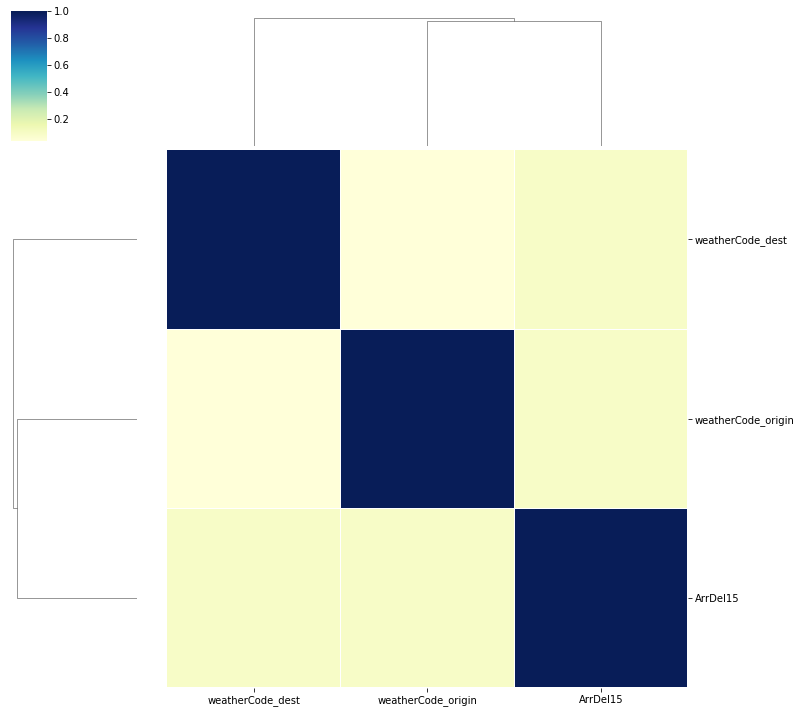

In [53]:
corrmat = data[catagorical_varible+[target_variable[0]]].corr()
  
cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1)
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0)

In [52]:
for i in catagorical_varible+[target_variable[0]]:
    for j in catagorical_varible+[target_variable[0]]:
        CrosstabResult=pd.crosstab(index=data[i],columns=data[j])

        
        # Performing Chi-sq test
        ChiSqResult = chi2_contingency(CrosstabResult)
        
        # P-Value is the Probability of H0 being True
        # If P-Value>0.05 then only we Accept the assumption(H0)
        
        print('The P-Value of the ChiSq Test for '+i+' vs '+j+' is:', ChiSqResult[1])

The P-Value of the ChiSq Test for winddir16Point_origin vs winddir16Point_origin is: 0.0
The P-Value of the ChiSq Test for winddir16Point_origin vs winddir16Point_dest is: 0.0
The P-Value of the ChiSq Test for winddir16Point_origin vs weatherCode_origin is: 0.0
The P-Value of the ChiSq Test for winddir16Point_origin vs weatherCode_dest is: 0.0
The P-Value of the ChiSq Test for winddir16Point_origin vs ArrDel15 is: 0.0
The P-Value of the ChiSq Test for winddir16Point_dest vs winddir16Point_origin is: 0.0
The P-Value of the ChiSq Test for winddir16Point_dest vs winddir16Point_dest is: 0.0
The P-Value of the ChiSq Test for winddir16Point_dest vs weatherCode_origin is: 0.0
The P-Value of the ChiSq Test for winddir16Point_dest vs weatherCode_dest is: 0.0
The P-Value of the ChiSq Test for winddir16Point_dest vs ArrDel15 is: 0.0
The P-Value of the ChiSq Test for weatherCode_origin vs winddir16Point_origin is: 0.0
The P-Value of the ChiSq Test for weatherCode_origin vs winddir16Point_dest is: 

In [33]:
ChiSqResult

(13211.972156378088,
 0.0,
 225,
 array([[ 5251.58603624,  4865.54562028,  5634.06250375,  1432.05928538,
          4393.21445251,  3821.52472196,  3264.6847766 ,  4815.43434514,
          8937.57271874,  5694.10963517,  7574.25443903,  9665.96818256,
          9219.9346344 ,  9018.35555023,  6281.13514389, 10096.55795412],
        [ 5097.55716384,  4722.83930255,  5468.81560719,  1390.05702636,
          4264.36159479,  3709.43950814,  3168.93166289,  4674.19778971,
          8675.43395945,  5527.10155792,  7352.10176697,  9382.46560457,
          8949.51420798,  8753.84743273,  6096.9096248 ,  9800.4261901 ],
        [ 5588.85253037,  5178.01989036,  5995.89233863,  1524.02876112,
          4675.35474806,  4066.95005372,  3474.34882504,  5124.69037715,
          9511.56004298,  6059.79580705,  8060.68696107, 10286.7344004 ,
          9812.05575911,  9597.53089617,  6684.52117138, 10744.97743739],
        [ 1418.51555679,  1314.24147049,  1521.82697843,   386.81616573,
          1186.